# TASK: Prediction Using Unsupervised ML 

# Prediction of optimum number of clusters and its visualizations

PRESENTED BY: PRATHAMESH GAIKAR

IMPORT LIBRARIES

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 

READ DATA

In [28]:
data= pd.read_csv('C:/Users/prath/Desktop/SPARKFOUNDATION/Iris.csv')

In [29]:
data_copy=data.copy()

In [30]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


FINDING THE SHAPE OF DATA

In [31]:
print('Number of Observations in Data:', data.shape[0])
print('Number of variables in Data:', data.shape[1])

Number of Observations in Data: 150
Number of variables in Data: 6


DESCRIBING DATA

In [32]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


DROPPING COLUMN ID AND SPECIES

In [33]:
data.drop(['Id','Species'],inplace=True,axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


DISTRIBUTION OF DATA

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

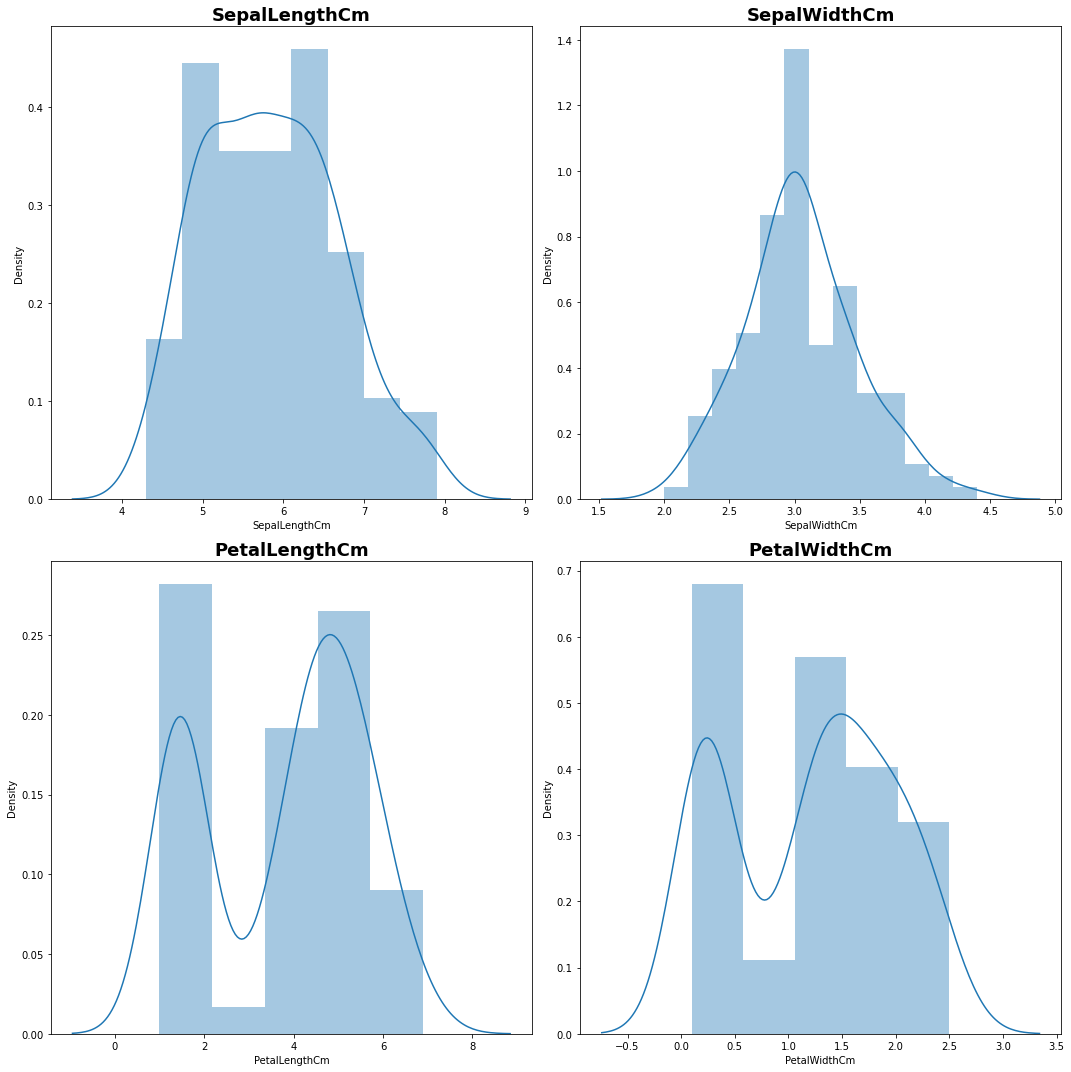

In [46]:
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(data[data.columns[i]])
    ax.set_title(data.columns[i],color='Black',fontsize=18,fontweight ='bold')
plt.tight_layout()

In [35]:
data.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

PAIRPLOT

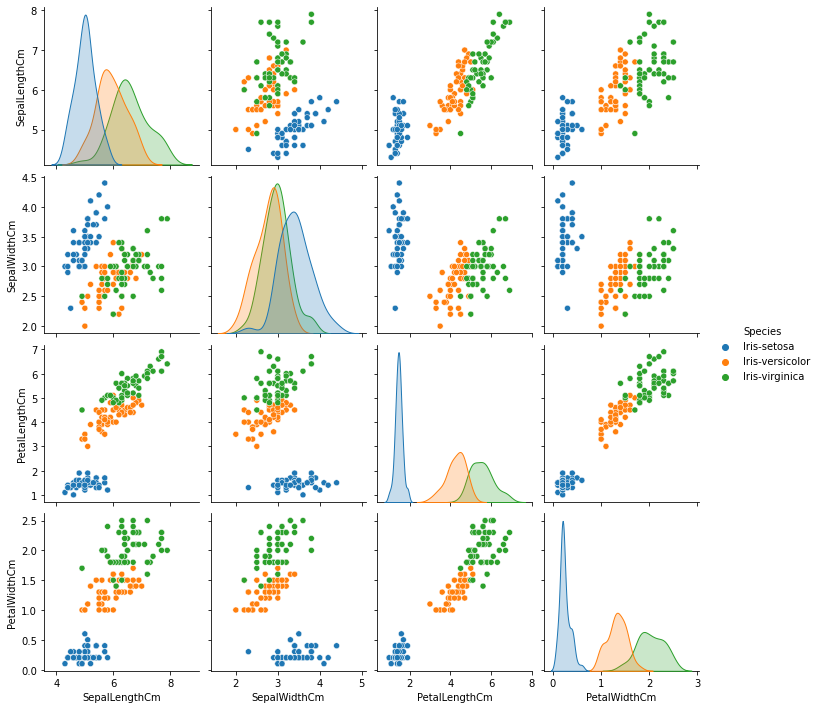

In [36]:
sns.pairplot(data_copy.drop('Id',axis=1),hue='Species')

CALCULATING ds AND PREDICTION OF CLUSTERs

In [37]:
ds =[]

In [38]:
for i in range(1,11):
    KM = KMeans(n_clusters=i, init = 'k-means++')
    KM.fit(data)
    ds.append(KM.inertia_)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
ds

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 39.251830892636775,
 34.45600391959086,
 29.955568877177583,
 27.915606060606077,
 26.049484715576813]

In [40]:
k_means=KMeans(n_clusters=3, init = 'k-means++')
label = k_means.fit_predict(data)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

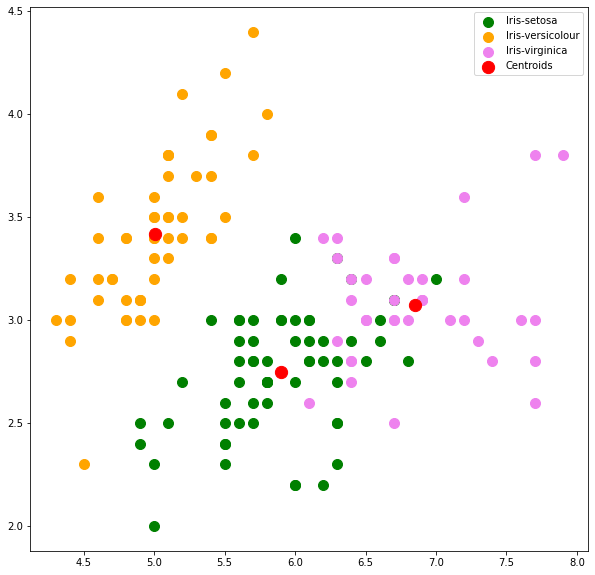

In [48]:
fig=plt.figure(figsize=(10,10))

#filter rows of original data
filtered_label0 = data[label == 0].iloc[:,:].values
filtered_label1 = data[label == 1].iloc[:,:].values
filtered_label2 = data[label == 2].iloc[:,:].values

#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] ,s=100, color = 'green', label = 'Iris-setosa')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] ,s=100, color = 'orange', label = 'Iris-versicolour')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] ,s=100, color = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1],s=150,color = 'red', label = 'Centroids')

plt.legend()